In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split

In [24]:
# Step 1: Generate the random sample
np.random.seed(42)
x = np.linspace(-10, 10, 1000)
y = np.sin(x) + np.random.normal(scale=0.5, size=x.shape)  # Example function with noise

# Convert to PyTorch tensors
x_tensor = torch.from_numpy(x).float().unsqueeze(1)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

# Create dataset and DataLoader
dataset = TensorDataset(x_tensor, y_tensor)

# Split dataset into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [15]:
# Step 2: Define the MLP model in PyTorch
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(1, 64)
        self.hidden2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

In [36]:
# Initialize the model, loss function, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

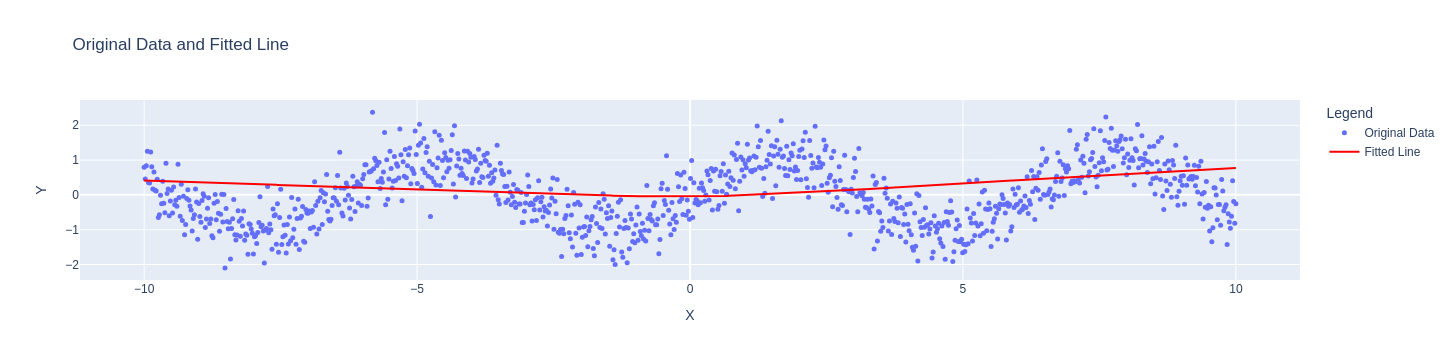

In [37]:
# Evaluate the model and plot the results using Plotly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
x_tensor = x_tensor.to(device)

model.eval()
with torch.no_grad():
    predicted = model(x_tensor).cpu().detach().numpy()  # Move the predicted tensor back to CPU

# Plot the results using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Original Data', marker=dict(size=5)))

# Fitted line
fig.add_trace(go.Scatter(x=x, y=predicted.flatten(), mode='lines', name='Fitted Line', line=dict(color='red')))

fig.update_layout(
    title="Original Data and Fitted Line",
    xaxis_title="X",
    yaxis_title="Y",
    legend_title="Legend"
)

fig.show()

In [38]:
import mlflow
import mlflow.pytorch
# Set the MLflow experiment name
mlflow.set_experiment("MLflow Quickstart")
mlflow.set_tracking_uri(uri="http://localhost:8080")

In [39]:
from tqdm import tqdm
def train_model(model, criterion, optimizer, train_loader, test_loader, epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with mlflow.start_run() as run:
        for epoch in tqdm(range(epochs)):
            model.train()
            train_loss = 0
            train_samples = 0
            for data, target in train_loader:
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                train_loss += loss.item() * data.size(0)
                train_samples += data.size(0)
            average_train_loss = train_loss / train_samples

            # Evaluate on the test set
            model.eval()
            test_loss = 0
            test_samples = 0
            with torch.no_grad():
                for data, target in test_loader:
                    data, target = data.to(device), target.to(device)
                    output = model(data)
                    loss = criterion(output, target)
                    test_loss += loss.item() * data.size(0)
                    test_samples += data.size(0)
            average_test_loss = test_loss / test_samples

            # Log metrics
            mlflow.log_metric("training_loss", average_train_loss, step=epoch)
            mlflow.log_metric("testing_loss", average_test_loss, step=epoch)
            mlflow.log_param("epochs", epochs)

        # Log the model
        mlflow.pytorch.log_model(model, "model")

In [40]:
# Train the model
train_model(model, criterion, optimizer, train_loader, test_loader, epochs=1500)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:47<00:00, 31.82it/s]


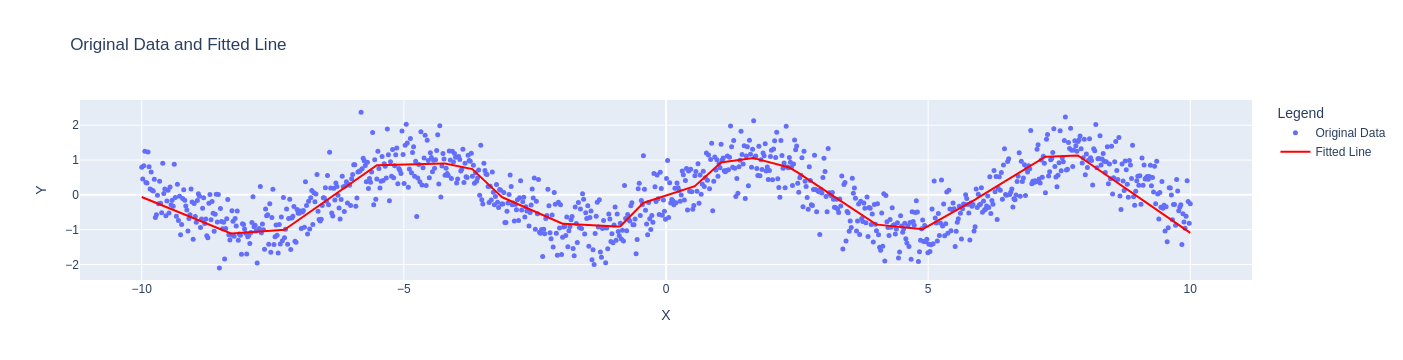

In [41]:
# Evaluate the model and plot the results using Plotly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
x_tensor = x_tensor.to(device)

model.eval()
with torch.no_grad():
    predicted = model(x_tensor).cpu().detach().numpy()  # Move the predicted tensor back to CPU

# Plot the results using Plotly
fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Original Data', marker=dict(size=5)))

# Fitted line
fig.add_trace(go.Scatter(x=x, y=predicted.flatten(), mode='lines', name='Fitted Line', line=dict(color='red')))

fig.update_layout(
    title="Original Data and Fitted Line",
    xaxis_title="X",
    yaxis_title="Y",
    legend_title="Legend"
)

fig.show()

[I 2024-06-01 17:05:38,404] A new study created in memory with name: no-name-8d1cfcd7-cafe-4445-86e6-fb9d0076614a
[I 2024-06-01 17:05:38,406] Trial 0 finished with value: 0.9304149507804893 and parameters: {'A': 0.4612316361068648, 'w': 0.2438840235763723, 'C': -2.7396045172390666}. Best is trial 0 with value: 0.9304149507804893.
[I 2024-06-01 17:05:38,407] Trial 1 finished with value: 1.3824578533022254 and parameters: {'A': 1.0648138919123984, 'w': 0.6573925892222917, 'C': 1.2175270236054576}. Best is trial 0 with value: 0.9304149507804893.
[I 2024-06-01 17:05:38,408] Trial 2 finished with value: 1.034833527196754 and parameters: {'A': 0.6323709044763852, 'w': 1.3871817330971172, 'C': 0.6764079514602068}. Best is trial 0 with value: 0.9304149507804893.
[I 2024-06-01 17:05:38,409] Trial 3 finished with value: 2.3244748056419358 and parameters: {'A': 1.6540822246539293, 'w': 0.38958839849149074, 'C': 0.9538824067999885}. Best is trial 0 with value: 0.9304149507804893.
[I 2024-06-01 17:

Best parameters:
A = 1.0410608161433683
w = 1.0007129698600739
C = 0.013696980601511921


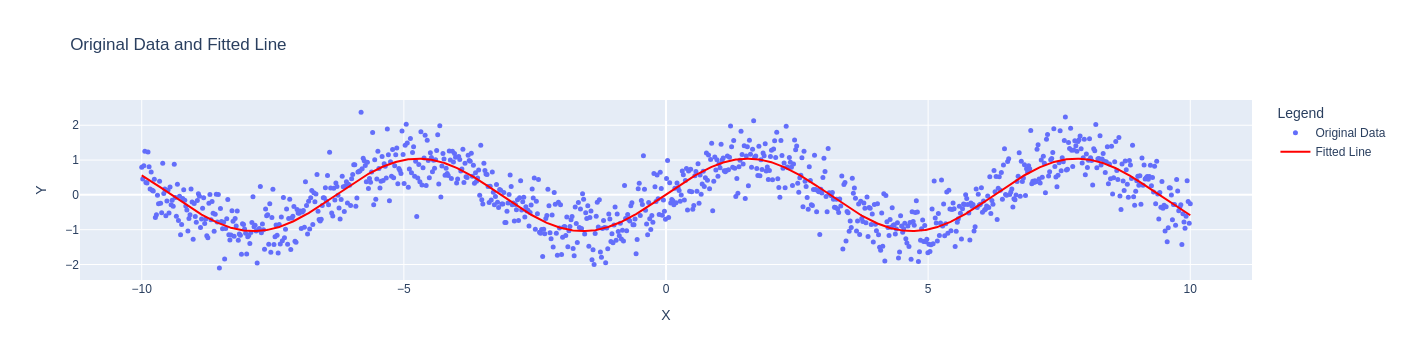

In [44]:
import optuna


# Step 2: Define the objective function
def objective(trial):
    A = trial.suggest_float("A", 0.1, 2.0)
    w = trial.suggest_float("w", 0.1, 2.0)
    C = trial.suggest_float("C", -np.pi, np.pi)
    
    y_pred = A * np.sin(w * x + C)
    error = np.mean((y - y_pred) ** 2)
    
    return error

# Step 3: Optimize the parameters using Optuna's CMA-ES sampler
sampler = optuna.samplers.CmaEsSampler()
study = optuna.create_study(sampler=sampler)
study.optimize(objective, n_trials=150)

# Step 4: Retrieve the best parameters
best_params = study.best_params
A_opt = best_params["A"]
w_opt = best_params["w"]
C_opt = best_params["C"]

print("Best parameters:")
print(f"A = {A_opt}")
print(f"w = {w_opt}")
print(f"C = {C_opt}")

# Step 5: Plot the original data and the fitted curve
y_opt = A_opt * np.sin(w_opt * x + C_opt)

fig = go.Figure()

# Original data
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Original Data', marker=dict(size=5)))

# Fitted line
fig.add_trace(go.Scatter(x=x, y=y_opt, mode='lines', name='Fitted Line', line=dict(color='red')))

fig.update_layout(
    title="Original Data and Fitted Line",
    xaxis_title="X",
    yaxis_title="Y",
    legend_title="Legend"
)

fig.show()